Se seguiran una serie de pasos para hacer un análisis de opiniones con TextBlob.
Básicamente, dará 2 métricas.

--Polaridad = La polaridad se encuentra en el rango de [-1,1] donde 1 significa una declaración positiva y -1 significa una declaración negativa.

--Subjetividad = La subjetividad se refiere a que principalmente es una opinión pública y no información fáctica [0,1].

<h1>Datos<h1>

In [1]:
from textblob import TextBlob
import pandas as pd 
import numpy as np 
from googletrans import Translator

<h1>Paso 1 preprocesamiento de text

Abrimos la base de datos

In [2]:
data = pd.read_csv("ComentariosIngles.csv")

Si los datos estan es español se tendrian que traducir al ingles 

Funcion para traducir los datos con TextBlob 
Nota: TextBlob pone un limite del numero de traducciones que puede hacer por dia lo cual es un un inconveniente por el numero de datos que se estan manejando

In [5]:
#for x in range(len(data.Opinion)):
 #   tb=TextBlob(data.Opinion[x])
  #  aux=tb.translate(to="en")
   # data.Opinion[x]=str(aux)

Funcion para traducir con  la libreria Googletrans, esta no pone un limite de traducciones

In [6]:
#for x in range(len(data.Opinion)):
 #   info=translator.translate(data.Opinion[x])
  #  aux=info.text
   # data.Opinion[x]=str(aux)
    #print(x)

Estructuda del CSV

In [7]:
data[0:5]

,Estrellas,Opinion,Id,Titulo
0,5.0 de 5 estrellas,It's one of those books that make you desperat...,Miguel Avila,\nY yo a ti más\n
1,5.0 de 5 estrellas,It is true that history gives several unexpect...,Miguel Inguanzo,\nY yo a ti más\n
2,5.0 de 5 estrellas,It is not the style of novels or books that I ...,alida,\nY yo a ti más\n
3,4.0 de 5 estrellas,The article is very good only that they do not...,Eduardo Rangel,\nRascal Does Not Dream of Bunny Girl Senpai (...
4,5.0 de 5 estrellas,"I love him, in general all very well",Cesar Rincon,\nRascal Does Not Dream of Bunny Girl Senpai (...


sacar el entero de las estrellas y decir si es bueno o malo

In [8]:
for x in range(len(data.Estrellas)):
    aux= data.Estrellas[x].split(".")
    aux=int(aux[0])
    data.Estrellas[x]= aux

Convertimos a data frame

In [9]:
frame = pd.DataFrame(columns=["Estrella","Comentario","Analisis"])

In [10]:
df = pd.DataFrame({'Estrellas':data.Estrellas ,'Opinion':data.Opinion,'Analisis':np.zeros(len(data.Opinion)) })

Conversion de datos de texto a minusculas

In [11]:
df['Opinion'] = df['Opinion'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Opinion'][0:3]

0    it's one of those books that make you desperat...
1    it is true that history gives several unexpect...
2    it is not the style of novels or books that i ...
Name: Opinion, dtype: object

Eliminación de puntuación

In [12]:
df ['Opinion']= df ['Opinion']. str.replace ("[^\w\s]", " ")
df ['Opinion'][0]

'it s one of those books that make you desperate  make you angry  force you to hate some characters and you keep waiting for something to happen that helps you understand what the hell is happening and why it is happening that way  i am not an expert  in books  i can only tell you from my opinion  buy it  it will help you pass the time and without a doubt you will want to finish it just to see the end and discover all the chaos that is forming  there are things that you will surely intuit from the beginning  but there will be others that i assure you  will surprise you '

Eliminacion de StopWords

In [13]:
import nltk
from nltk.corpus import stopwords

In [14]:
stop = stopwords.words('english')
df ['Opinion'] = df ['Opinion'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df ['Opinion'][0]

'one books make desperate make angry force hate characters keep waiting something happen helps understand hell happening happening way expert books tell opinion buy help pass time without doubt want finish see end discover chaos forming things surely intuit beginning others assure surprise'

Estandarizacion de texto

In [16]:
#se omitira por que no se cuales son las abreviaciones en ingles

Correcion ortografica

In [18]:
df ['Opinion']=df ['Opinion'].apply(lambda x: str(TextBlob(x).correct()))

Derivacion

Derivado
 La derivación es un proceso de extracción de una palabra raíz. Por ejemplo, "pescado", "peces" y "pesca" se derivan del pescado.

In [19]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [20]:
df ['Opinion']=df ['Opinion'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
#df ['Opinion']

Lematización
La lematización es un proceso de extracción de una palabra raíz considerando el vocabulario. Por ejemplo, "bueno", "mejor" o "mejor" se lematiza como bueno.

In [21]:
from textblob import Word

In [22]:
df ['Opinion'] = df ['Opinion'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#df ['Opinion']

In [23]:
df ['Opinion'][0]

'one book make desper make angri forc hate charact keep wait someth happen help understand hell happen happen way expert book tell opinion buy help pas time without doubt want finish see end discov chao form thing sure intuit begin other assur surpris'

Analisis de sentimientos con TextBlob

In [24]:
blob = TextBlob(df['Opinion'][0])

In [25]:
blob.sentiment

Sentiment(polarity=-0.1416666666666667, subjectivity=0.7212962962962962)

<h1>Analisis exploratorio de los datos

Este paso no está relacionado con la predicción de sentimientos; lo que estamos tratando de hacer aquí es profundizar en los datos y comprenderlos.

In [26]:
import matplotlib.pyplot as plt
reviews=df

Histograma de todos los datos

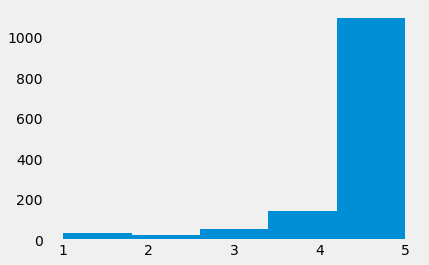

In [51]:
reviews.Estrellas.hist(bins=5,grid=False)
plt.show()


In [28]:
print(reviews.groupby('Estrellas').count().Opinion)

Estrellas
1      38
2      25
3      56
4     144
5    1097
Name: Opinion, dtype: int64


Para que sean datos equilibrados, truncamos cada puntaje por el conteo n más bajo.

In [29]:
score_1 = reviews[reviews['Estrellas'] == 1].sample(n=25)
score_2 = reviews[reviews['Estrellas'] == 2].sample(n=25)
score_3 = reviews[reviews['Estrellas'] == 3].sample(n=25)
score_4 = reviews[reviews['Estrellas'] == 4].sample(n=25)
score_5 = reviews[reviews['Estrellas'] == 5].sample(n=25)
# Here we recreate a 'balanced' dataset.
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

Se verifica que el conjunto esta equilibrado

In [30]:
print(reviews_sample.groupby('Estrellas').count().Opinion)

Estrellas
1    25
2    25
3    25
4    25
5    25
Name: Opinion, dtype: int64


Nube de palabras

In [31]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

Se crea una sola cadena de todos los datos

In [33]:
cadena=' '
for x in range(len(reviews_sample.Opinion)):
    cadena=cadena+reviews_sample.Opinion[x]

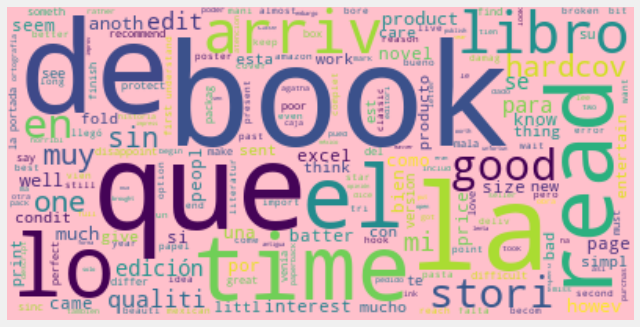

In [52]:
reviews_str = cadena
wordcloud = WordCloud(background_color='pink').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

 Ahora dividamos los datos en comentarios negativos (la puntuación es 1 o 2) y positivos (4 o 5).

In [35]:
negative_reviews = reviews_sample[reviews_sample['Estrellas'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Estrellas'].isin([4,5]) ]
negative_reviews.reset_index(drop=True, inplace=True)
positive_reviews.reset_index(drop=True, inplace=True)

Se transforma cada uno a una sola cadena

In [36]:
negative_reviews_str=' '
positive_reviews_str=' '
for x in range(len(negative_reviews.Opinion)):
    negative_reviews_str=negative_reviews_str+negative_reviews.Opinion[x]
for y in range(len(positive_reviews.Opinion)):
    positive_reviews_str=positive_reviews_str+positive_reviews.Opinion[y]

Se crean las nubes de palabras

In [37]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)

Plot

Text(0.5, 1.0, 'Reviews with Negative Scores')

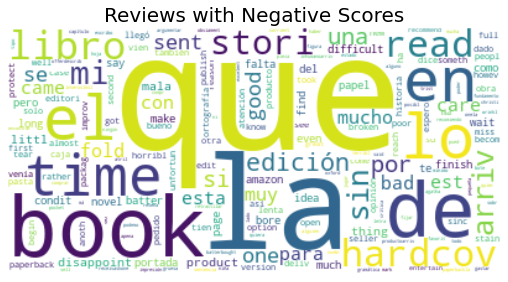

In [38]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

Text(0.5, 1.0, 'Reviews with Positive Scores')

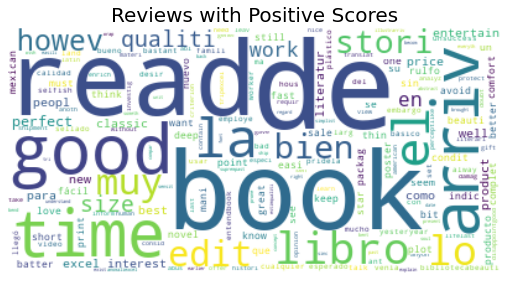

In [39]:
fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(211)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)

Puntuacion de sentimiento

Se utilizara un  modelo previamente entrenado toma la entrada de la descripción del texto y genera la puntuación de sentimiento que va de -1 a +1 para cada oración.

In [40]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')

Funcion que genera el analisis de sentimientos

In [41]:

cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [42]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in reviews_sample.Opinion:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

Se crea un nuevo dataframe con los resultados

In [43]:
  
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head(5)

,neg,neu,pos,compound
0,0.135,0.865,0.000,-0.5574
1,0.000,1.000,0.000,0.0000
2,0.000,1.000,0.000,0.0000
3,0.000,0.714,0.286,0.4939
4,0.000,1.000,0.000,0.0000


Se fusionan los resultados del analisis sentimientos con el marco de datos de opiniones

In [45]:
df_c = pd.concat([reviews_sample,df_sentiments.reset_index(drop=True)], axis=1)
df_c.head(3)

,Estrellas,Opinion,Analisis,neg,neu,pos,compound
0,1,horribl e inverosímil que alguien que dice hab...,0.0,0.135,0.865,0.0,-0.5574
1,1,arriv mark receiv,0.0,0.000,1.000,0.0,0.0000
2,1,ask,0.0,0.000,1.000,0.0,0.0000


Convierta puntajes en sentimientos positivos y negativos usando algún umbral

In [53]:
df_c['Analisis'] = np.where(df_c['compound'] > 0 , 'Positive', 'Negative')
df_c.head(5)

,Estrellas,Opinion,Analisis,neg,neu,pos,compound
0,1,horribl e inverosímil que alguien que dice hab...,Negative,0.135,0.865,0.000,-0.5574
1,1,arriv mark receiv,Negative,0.000,1.000,0.000,0.0000
2,1,ask,Negative,0.000,1.000,0.000,0.0000
3,1,one favorit book said hardcov sent paperback c...,Positive,0.000,0.714,0.286,0.4939
4,1,describ sell hardcov book came paperback,Negative,0.000,1.000,0.000,0.0000


Informacion General

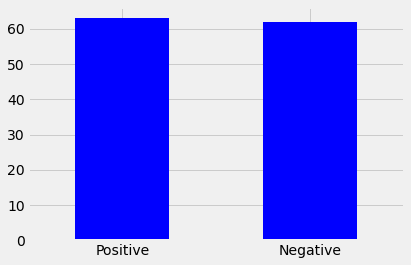

In [54]:
result=df_c['Analisis'].value_counts()
result.plot(kind='bar', rot=0,color='blue');